**IMPORTING ALL LIABRARIES**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

**READING DATASET**

In [21]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DESCRIBING DATASET**

In [23]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**CHECKING FOR NULL VALUE**

In [24]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**HISTOGRAM**

In [30]:
# using the style for the plot
plt.style.use('dark_background')

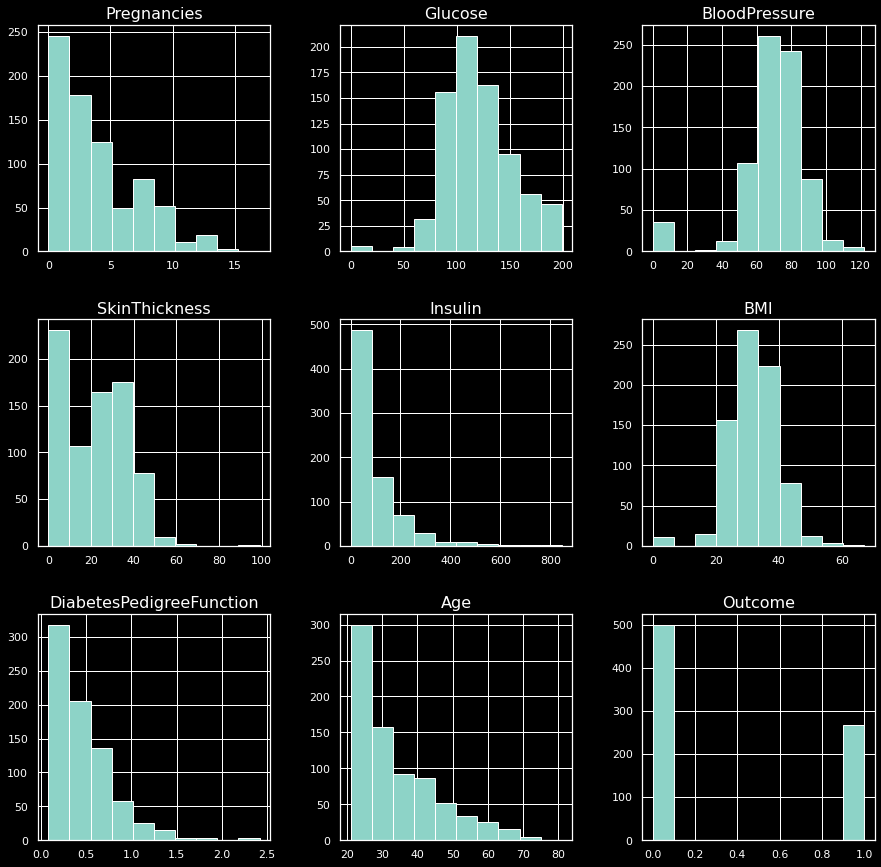

In [31]:
p = diabetes_df.hist(figsize = (15,15))

**SCATTER PLOT**

In [32]:
# using the style for the plot
plt.style.use('ggplot')

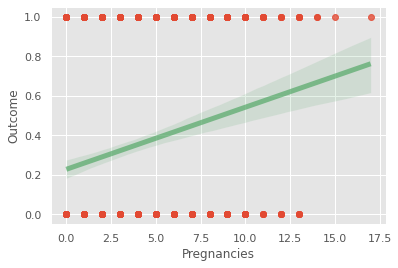

In [33]:
sns.regplot(x=diabetes_df["Pregnancies"], y=diabetes_df["Outcome"], line_kws={"color":"g","alpha":0.7,"lw":5})

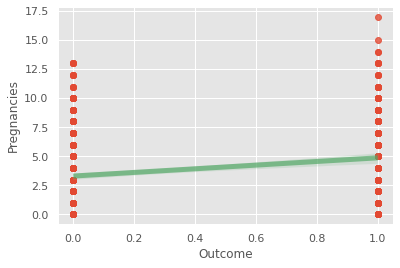

In [34]:
sns.regplot(x=diabetes_df["Outcome"], y=diabetes_df["Pregnancies"], line_kws={"color":"g","alpha":0.7,"lw":5})

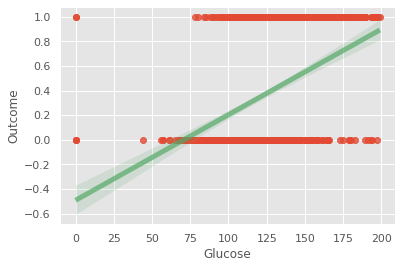

In [35]:
sns.regplot(x=diabetes_df["Glucose"], y=diabetes_df["Outcome"], line_kws={"color":"g","alpha":0.7,"lw":5})

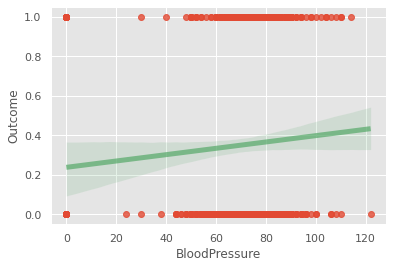

In [36]:
sns.regplot(x=diabetes_df["BloodPressure"], y=diabetes_df["Outcome"], line_kws={"color":"g","alpha":0.7,"lw":5})

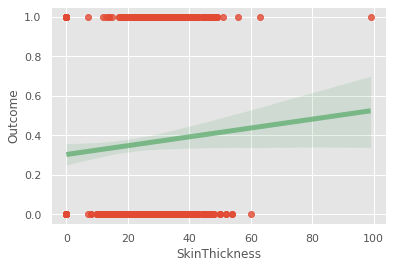

In [37]:
sns.regplot(x=diabetes_df["SkinThickness"], y=diabetes_df["Outcome"], line_kws={"color":"g","alpha":0.7,"lw":5})

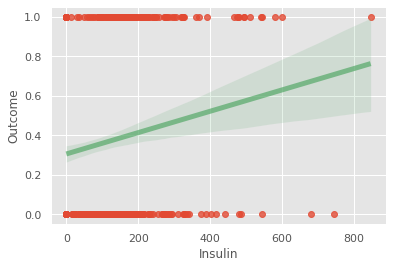

In [38]:
sns.regplot(x=diabetes_df["Insulin"], y=diabetes_df["Outcome"], line_kws={"color":"g","alpha":0.7,"lw":5})

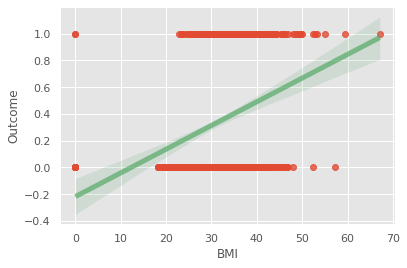

In [39]:
sns.regplot(x=diabetes_df["BMI"], y=diabetes_df["Outcome"], line_kws={"color":"g","alpha":0.7,"lw":5})

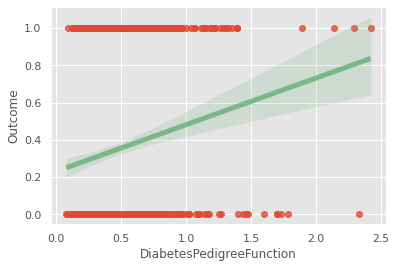

In [40]:
sns.regplot(x=diabetes_df["DiabetesPedigreeFunction"], y=diabetes_df["Outcome"], line_kws={"color":"g","alpha":0.7,"lw":5})

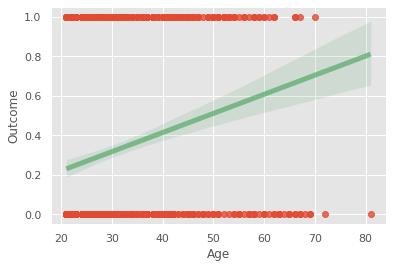

In [41]:
sns.regplot(x=diabetes_df["Age"], y=diabetes_df["Outcome"], line_kws={"color":"g","alpha":0.7,"lw":5})

**RANDOM FOREST CLASSIFIER**

In [6]:
features= diabetes_df.columns

In [7]:
features=[x for x in features if x!= 'Outcome']

In [10]:
train,test=train_test_split(diabetes_df,test_size=0.25,random_state=7)
print(len(diabetes_df))
print(len(train))
print(len(test))

768
576
192


In [15]:
x_train=train[features]
y_train=train["Outcome"]
x_test=test[features]
y_test=test["Outcome"]


In [16]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [18]:
y_pred= rfc.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [42]:
score=accuracy_score(y_test,y_pred)*100
print("Accuracy rate using Random Forest Classifier: ",round(score,1),"%")

Accuracy rate using Random Forest Classifier:  77.1 %


**NAIVE BAYES**

In [49]:
Nb = GaussianNB()
Nb = Nb.fit (x_train, y_train)

In [50]:
train,test=train_test_split(diabetes_df,test_size=0.25)
print(len(diabetes_df))
print(len(train))
print(len(test))

768
576
192


In [51]:
y_pred= Nb.predict(x_test)

In [52]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [53]:
score=accuracy_score(y_test,y_pred)*100
print("Accuracy rate using Naive Bayes: ",round(score,1),"%")

Accuracy rate using Naive Bayes:  75.5 %
